# Question 2 - Analysis 1
- Analysis 1 : Most discussed topics in 2016 
- Dataset : Archive API NYT


In [63]:
import json,codecs,glob
from nltk import FreqDist

file_path = "/Users/vega/Desktop/midterm/data/dataset_archiveapi/2016/*.json"
files=glob.glob(file_path)   
keywords = []

for file in files:     
    data_file = codecs.open(file, 'r', encoding='utf8',errors='ignore')
    data = json.load(data_file)
    res = data["response"]["docs"]
    for i in res:
        keywords.append(i["keywords"])
keyword_Values = [g['value'] for d in keywords for g in d]
print("There were %d keywords for the year 2016." % len(keyword_Values))

fd = FreqDist(keyword_Values) 
d = fd.most_common(10)
print("The top 10 common keywords were: ")
print([item[0] for item in d])


There were 340303 keywords for the year 2016.
The top 10 common keywords were: 
['Presidential Election of 2016', 'Trump, Donald J', 'Clinton, Hillary Rodham', 'Books and Literature', 'Movies', 'New York City', 'Television', 'United States Politics and Government', 'Music', 'Republican Party']


In [94]:
# Create CSV

freq_list = []
for word in fd.keys():
    freq_list.append([word, fd[word]])
sorted_freq_list = sorted(freq_list, key=lambda t:t[1], reverse=True)
    
import csv
a = [['Keywords','Frequency']]
path = "Processed Data"
with open(path+'\\'+'analysisQues2-1.csv','w') as f:
    writer = csv.writer(f)
    writer.writerows(a)
    writer.writerows(sorted_freq_list)


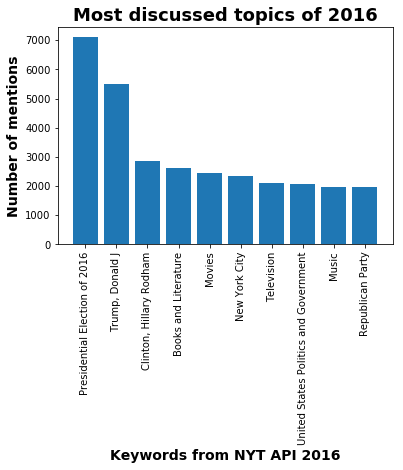

In [95]:
#Create the matplotlib graph

topwords = [item[0] for item in d]
top10_keyFreq = [item[1] for item in d]

import matplotlib.pyplot as plt
plt.title('Most discussed topics of 2016', fontsize=18, fontweight='bold')
plt.xlabel('Keywords from NYT API 2016', fontsize=14, fontweight='bold')
plt.ylabel('Number of mentions', fontsize=14, fontweight='bold')
plt.bar(range(len(top10_keyFreq)), top10_keyFreq, align='center')
plt.xticks(range(len(top10_keyFreq)), topwords, size='medium',rotation=90)
plt.show()

# Conclusion :

Based on the above analysis, we can conclude that the most discussed topic for 2016 was Presidential Election of 2016 followed by Donald Trump Jr and Hillary Clinton.